In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MLDL/Progetto/BiseNetv1

!pip install wandb

%env PYTHONPATH=/content/drive/MyDrive/MLDL/Progetto/BiseNetv1

!python step2/main_step2.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MLDL/Progetto/BiseNetv1
env: PYTHONPATH=/content/drive/MyDrive/MLDL/Progetto/BiseNetv1
wandb: Currently logged in as: chyyivan (mldlproj1gr2). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.16
wandb: Run data is saved locally in /content/drive/MyDrive/MLDL/Progetto/BiseNetv1/wandb/run-20220510_120615-2uxl4mgm
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run dashing-wave-16
wandb: ⭐️ View project at https://wandb.ai/mldlproj1gr2/step2
wandb: 🚀 View run at https://wandb.ai/mldlproj1gr2/step2/runs/2uxl4mgm
epoch 0, lr 0.025000: 100% 500/500 [10:34<00:00,  1.27s/it, loss=2.139816]
loss for train : 2.467451
start val!
precision per pixel for test: 0.695
mIoU for validation: 0.217
mIoU per class: [8.86684631e-01 3.54503387e-01 6.69030791e-01 7.61316011e-07
 0.00000000e+00 0.00000000e

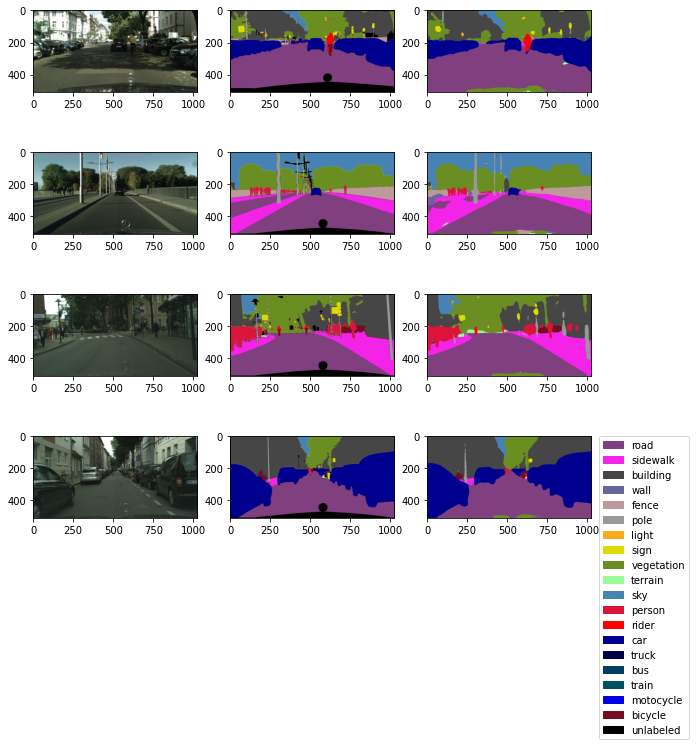

In [ ]:
from dataset.Cityscapes import Cityscapes
from torch.utils.data import DataLoader
import torch
from model.build_BiSeNet import BiSeNet
from utils import denormalize_image, format_image_print, format_label_print, get_legend_handles
import matplotlib.pyplot as plt

batch_size = 4
dataset_train = Cityscapes('../Cityscapes', 'val', [512, 1024])
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
img_batch, lbl_batch = next(iter(dataloader_train))

model = BiSeNet(19, "resnet101")
model.load_state_dict(torch.load('checkpoints_101_sgd/best_dice_loss2022_01_05_01_06_30.pth'))
model.eval()

with torch.no_grad():
    fig, axarr = plt.subplots(batch_size, 3, figsize=(10, 10))
    pred_batch = model(img_batch)
    pred_lbl_batch = torch.argmax(pred_batch, dim=1)

    patches = get_legend_handles(dataset_train.labels, dataset_train.palette)

    for idx in range(batch_size):
        img = img_batch[idx]
        img_denorm = denormalize_image(img, dataset_train.mean, dataset_train.std)
        lbl = lbl_batch[idx]
        pred = pred_lbl_batch[idx]

        axarr[idx, 0].imshow(format_image_print(img_denorm))
        axarr[idx, 1].imshow(format_label_print(lbl, dataset_train.palette))
        axarr[idx, 2].imshow(format_label_print(pred, dataset_train.palette))

        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

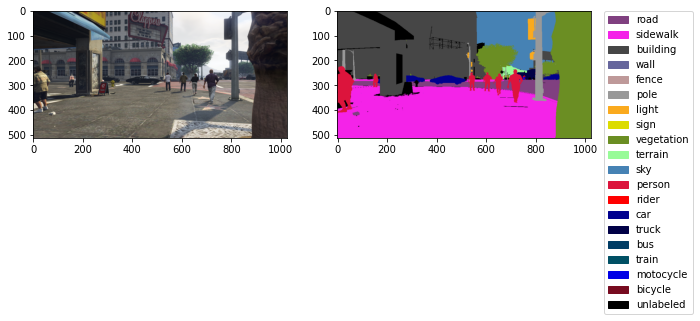

In [ ]:
from dataset.GTA5 import GTA5
from utils import denormalize_image, format_image_print, format_label_print, get_legend_handles
import matplotlib.pyplot as plt

batch_size = 4
dataset_train = GTA5('../GTA5', [512, 1024])

img, lbl = dataset_train[0]
img_denorm = denormalize_image(img, dataset_train.mean, dataset_train.std)

fig, axarr = plt.subplots(1, 2, figsize=(10, 10))

axarr[0].imshow(format_image_print(img_denorm))
axarr[1].imshow(format_label_print(lbl, dataset_train.palette))

patches = get_legend_handles(dataset_train.labels, dataset_train.palette)
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()